In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.api as sms
import statsmodels.formula.api as smf
import statsmodels.api as sm

%matplotlib inline
pd.set_option("display.max_columns", None)

In [94]:
df = pd.read_csv('/Users/carlottaulm/nf-sep-20/cgn-2020-ds-Project-EDA/King_County_Houses_EDA.csv')

## Normal Distribution Price
An assumption of linear regression is to have a normal distribution.
* log transformation can be used to normalize target variable and to reduce variability in skewed data. 

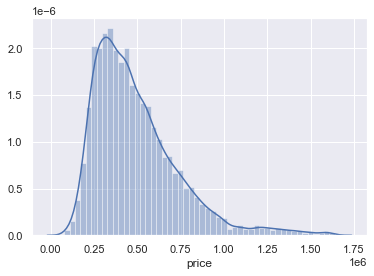

In [96]:
sns.distplot(df_m.price);

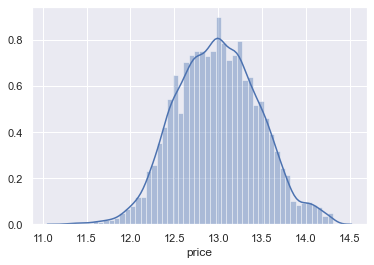

In [97]:
#house.price = np.log(house.price)
sns.distplot(np.log(df_m.price));

# Model
## Split the dataset into a train and a test set 
Data set need to be 'sufficient large'. Samples from the original training dataset are split into the two subsets using random selection. This is to ensure that the train and test datasets are representative of the original dataset.
Common split percentages include:

* Train: 80%, Test: 20%
* Train: 67%, Test: 33%
* Train: 50%, Test: 50%

The scikit-learn Python machine learning library provides an implementation of the train-test split evaluation procedure via the train_test_split() function.

Split original dataset into input (X) and output (y) columns

In [98]:
#y = np.log(df.price)
y = df.price

X = df.drop(['Unnamed: 0', 'id', 'price', 'floors', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode',
                'lat', 'long', 'cord', 'yr_built_bins', 'month_year', 'latbin', 'lonbin', 'price_sqft', 
             'sqft_above'], axis = 1)

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

## Multiple regression 
Adding different variables to get the best fit and to be able to predict house prices as acurate as possible. <br>
I ended up including almost all variables.

In [100]:
model = sm.OLS(y_train, X_train).fit()
#model.summary()

In [101]:
#model = sm.OLS(y_test, X_test).fit()
#model.summary()

In [102]:
y_pred = model.predict(X_test)

In [103]:
y_pred_t = model.predict(X_train)

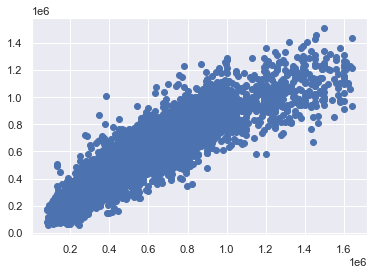

In [110]:
plt.scatter(y_train, y_pred_t);

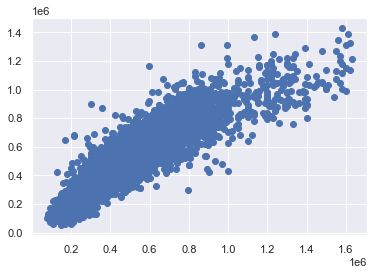

In [111]:
plt.scatter(y_test, y_pred);

## Mean Absolute Percentage Error (MAPE)
to evaluate the linear regression model <br>
How far are the model’s predictions off from their corresponding outputs on average in percentage

In [106]:
actual, pred = y_test, y_pred
def mape(actual, pred): 
    return np.mean(np.abs((actual - pred) / actual)) * 100
mape(actual, pred)

16.11553919765915

In [107]:
actual, pred = y_train, y_pred_t
def mape(actual, pred): 
    return np.mean(np.abs((actual - pred) / actual)) * 100
mape(actual, pred)

15.730366711667651

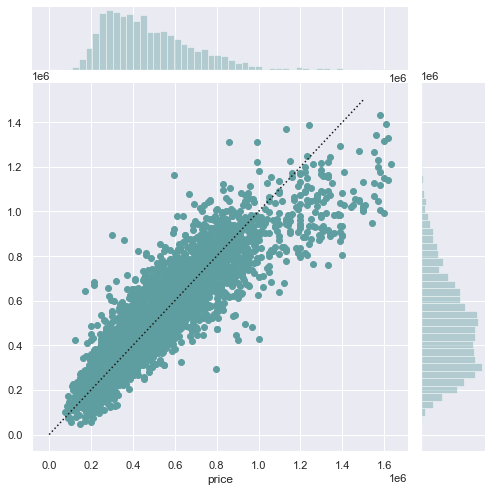

In [108]:
y_hat = model.predict(X_test)

sns.set(style="darkgrid")

g = sns.jointplot(y_test, y_hat,
                  color="cadetblue", height=7)

x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, ':k');

## Comparision of the Model with log Price and without

|   | __Regression 1__ <br> price |  __Regression 2__ <br> log price|   |   |
|---|---|---|---|---|
| __$R^2$__ <br>(train):  | 0.829  |  0.862 |   |   |
| __Adj. $R^2$__ <br>(train)  | 0.828  | 0.861  |   |   |
| __$R^2$__ <br>(test)  | 0.816  |  0.849 |   |   |
| __Adj. $R^2$__ <br>(test)  |  0.813  | 0.847  |   |   |
| __MAPE__ <br>(train)  |  15.73  | 1.0317 |   |   |
| __MAPE__ <br>(test) |   16.115 |  1.0325 |   |   |

### Residual Plot

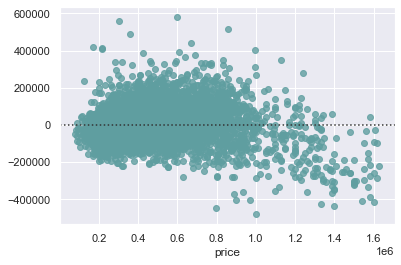

In [109]:
y_hat = model.predict(X_test)

sns.set(style="darkgrid")

g = sns.residplot(y_test, y_hat,
                  color="cadetblue")